In [1]:
from pap.view import plot_spectrogram
from pap.data import Session

import neural_analysis.spectra as spc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
monkey = 'jones'
sid = '0105'
session = Session(monkey, sid)

In [3]:
session.load_lfp_trials()

In [18]:
cf = session.lfp_trials.cond == 'awake'
af = session.lfp_trials.area == 'CPB'
sf = session.lfp_trials.stim == 'cpt_tone'

trials = session.lfp_trials.where(cf & af & sf, drop=True).data

In [19]:
trials.shape

(65, 56, 3000)

In [20]:
elec = 0
elec_trials = trials[:,0,:]
data_mat = elec_trials

In [21]:
trials.shape

(65, 56, 3000)

In [22]:
window = 0.4
step_size = 0.05
freq_range = [5,250]
low = -80
high = -20

In [23]:
mean = data_mat.mean(0)
fw = 2.5
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range, pad=False, freq_width=fw)
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range, pad=False, freq_width=fw)
    tp_spec += spec
tp_spec = tp_spec / n_trials

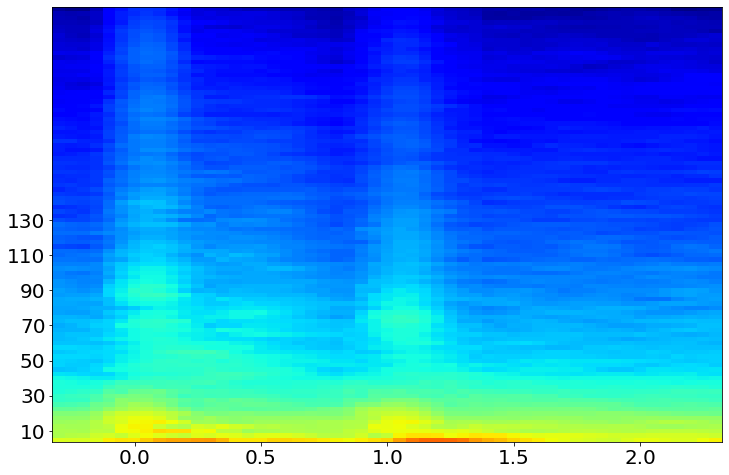

In [24]:
tick_fontsize = 20
tick_start = 10

tick_space = 20
cut_low = 5
cut_high= 150
fig, ax = plt.subplots(figsize=(12,8))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)
# ax.set_ylim([cut_low,85])
ax.set_yticks(np.arange(tick_start,cut_high,tick_space))
ax.set_yticklabels(np.arange(tick_start,cut_high,tick_space))
ax.tick_params(axis='both', labelsize=tick_fontsize)

In [25]:
from pap.utils import pickle_save
pickle_save(freq, 'freq_win400_250_long.pickle')

In [26]:
pickle_save(timepts, 'freq_timepts_win400_long.pickle')

In [88]:
mean = data_mat.mean(0)
fw = 4
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range, pad=False, freq_width=fw)
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range, pad=False, freq_width=fw)
    tp_spec += spec
tp_spec = tp_spec / n_trials

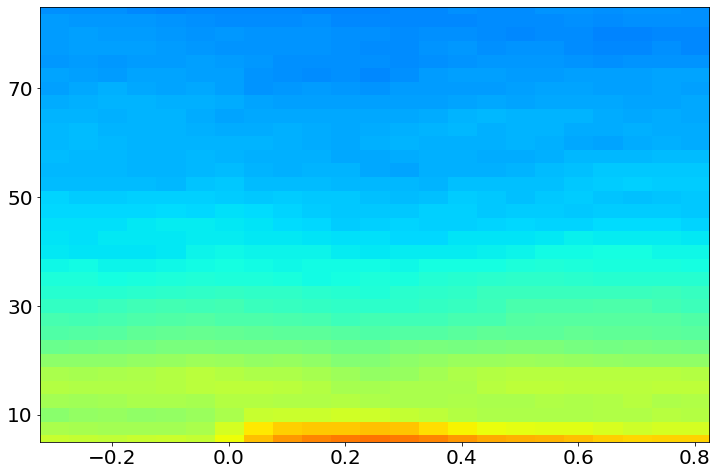

In [89]:
tick_fontsize = 20
tick_start = 10

tick_space = 20
cut_low = 5
cut_high=85
fig, ax = plt.subplots(figsize=(12,8))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)
ax.set_ylim([cut_low,85])
ax.set_yticks(np.arange(tick_start,cut_high,tick_space))
ax.set_yticklabels(np.arange(tick_start,cut_high,tick_space))
ax.tick_params(axis='both', labelsize=tick_fontsize)

In [9]:
freq

array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. ,
       32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5, 55. , 57.5,
       60. , 62.5, 65. , 67.5, 70. , 72.5, 75. , 77.5, 80. , 82.5, 85. ,
       87.5, 90. ])

In [14]:
freq_timepts = timepts - 0.5

In [15]:
freq_timepts

array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,
        0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,
        0.6 ,  0.65,  0.7 ,  0.75,  0.8 ])

In [17]:
from pap.utils import pickle_save, pickle_open
pickle_save(freq, 'freq_win400.pickle')
pickle_save(freq_timepts, 'freq_timepts_win400.pickle')

In [12]:
old_tmp = pickle_open('freq_timepts.pickle')

In [13]:
old_tmp

array([-0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,
        0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,
        0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85])

In [47]:
from pap.view import plot_spectrogram
import matplotlib.pyplot as plt
import numpy as np

In [51]:
500 / 150

3.3333333333333335

In [31]:
from math import floor
time_width = 0.4
freq_width = 2.5

TW = time_width*freq_width

n_tapers_max = floor(2*TW - 1)
n_tapers_max

1

In [32]:
mean = data_mat.mean(0)
fr = 8
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range, freq_width=fr)
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range, freq_width=fr)
    tp_spec += spec
tp_spec = tp_spec / n_trials

512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512
512


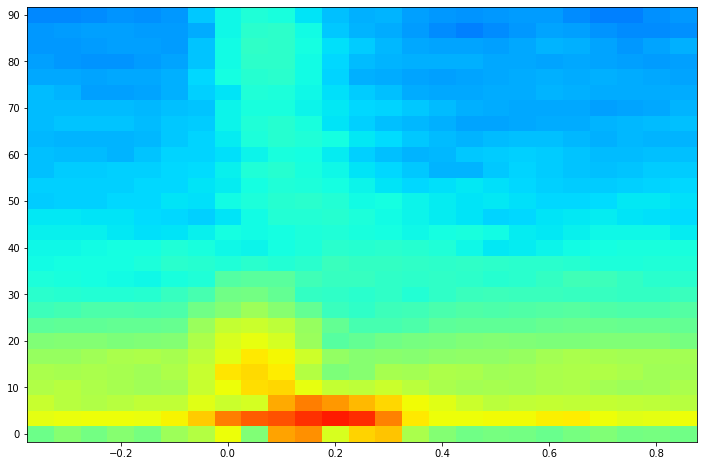

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)

In [44]:
freq

array([ 0.      ,  1.953125,  3.90625 ,  5.859375,  7.8125  ,  9.765625,
       11.71875 , 13.671875, 15.625   , 17.578125, 19.53125 , 21.484375,
       23.4375  , 25.390625, 27.34375 , 29.296875, 31.25    , 33.203125,
       35.15625 , 37.109375, 39.0625  , 41.015625, 42.96875 , 44.921875,
       46.875   , 48.828125, 50.78125 , 52.734375, 54.6875  , 56.640625,
       58.59375 , 60.546875, 62.5     , 64.453125, 66.40625 , 68.359375,
       70.3125  , 72.265625, 74.21875 , 76.171875, 78.125   , 80.078125,
       82.03125 , 83.984375, 85.9375  , 87.890625, 89.84375 ])

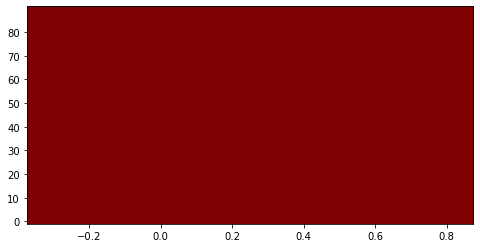

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
# S_db = 10*np.log10(tp_spec)
S_db = tp_spec
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)

In [135]:
mean = data_mat.mean(0)
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='wavelet') 
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='wavelet') 
#     spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
#     S_db = 10*np.log10(spec)
    tp_spec += spec
tp_spec = tp_spec / n_trials

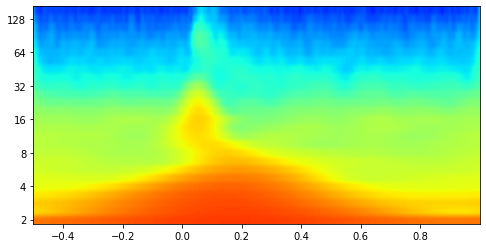

In [136]:
low = -50
high = 10
fig, ax = plt.subplots(figsize=(8,4))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)

In [137]:
mean = data_mat.mean(0)
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='wavelet') 
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='wavelet') 
#     spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
    S_db = 10*np.log10(spec)
    tp_spec += S_db
tp_spec = tp_spec / n_trials

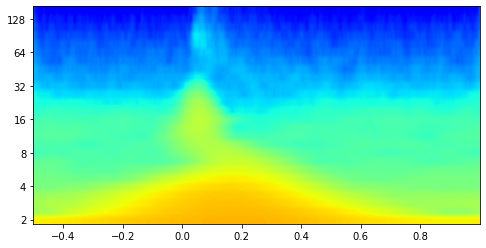

In [138]:
low = -50
high = 20
fig, ax = plt.subplots(figsize=(8,4))
# S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, tp_spec, cmap='jet', clim=[low, high], ax=ax)

In [73]:
trials = trial_load['drug_trials']['CPB']['puff_only']

In [74]:
elec = 0
elec_trials = trials[:,0,:]
data_mat = elec_trials

In [75]:
window = 0.3
step_size = 0.05
fr = [0, 90]
freq_range = fr
low = -80
high = -20

In [81]:
mean = data_mat.mean(0)
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
    tp_spec += spec
tp_spec = tp_spec / n_trials

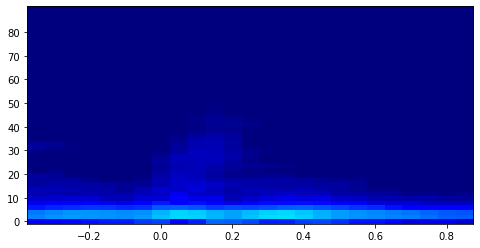

In [83]:
fig, ax = plt.subplots(figsize=(8,4))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)

In [84]:
mean = data_mat.mean(0)
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='wavelet') 
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='wavelet') 
#     spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
    tp_spec += spec
tp_spec = tp_spec / n_trials

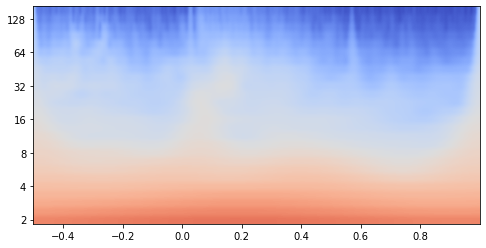

In [85]:
low = -50
high = 20
fig, ax = plt.subplots(figsize=(8,4))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='coolwarm', clim=[low, high], ax=ax)

In [119]:
trials = trial_load['drug_trials']['FEF']['puff_only']

In [120]:
elec = 0
elec_trials = trials[:,0,:]
data_mat = elec_trials

In [121]:
window = 0.3
step_size = 0.05
fr = [0, 90]
freq_range = fr
low = -80
high = -20

In [122]:
mean = data_mat.mean(0)
spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
    tp_spec += spec
tp_spec = tp_spec / n_trials

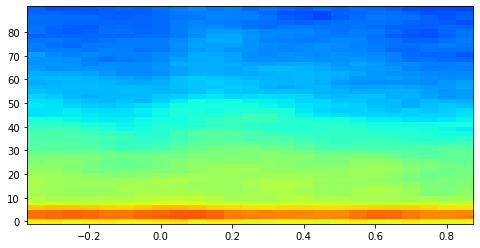

In [123]:
fig, ax = plt.subplots(figsize=(8,4))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='jet', clim=[low, high], ax=ax)

In [124]:
mean = data_mat.mean(0)
# spec, freq, timepts = spc.power_spectrogram(mean, 1000, method='wavelet') 
spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='wavelet', freqs=2**np.arange(0.1,7.5,0.25)) 
spec_shape = spec.shape

n_trials = data_mat.shape[0]

tp_spec = np.zeros(spec_shape)

for i in range(n_trials):
    spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='wavelet', freqs=2**np.arange(0.1,7.5,0.25)) 
#     spec, freq, timepts = spc.power_spectrogram(data_mat[i,:], 1000, method='multitaper', time_width=window, spacing=step_size, freq_range=freq_range)
    tp_spec += spec
tp_spec = tp_spec / n_trials

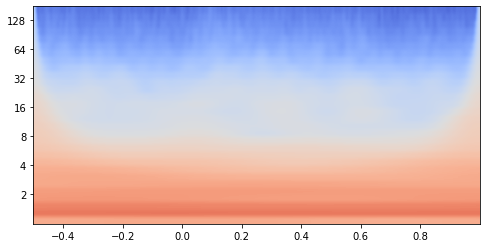

In [125]:
low = -50
high = 20
fig, ax = plt.subplots(figsize=(8,4))
S_db = 10*np.log10(tp_spec)
plot_spectrogram(timepts - 0.5, freq, S_db, cmap='coolwarm', clim=[low, high], ax=ax)

In [114]:
trials = trial_load['drug_trials']['FEF']['puff_only']

In [115]:
elec = 30
elec_trials = trials[:,0,:]
data_mat = elec_trials

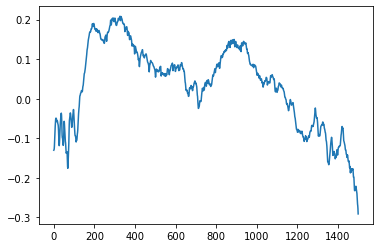

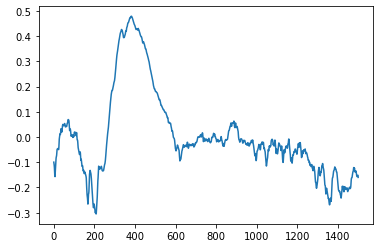

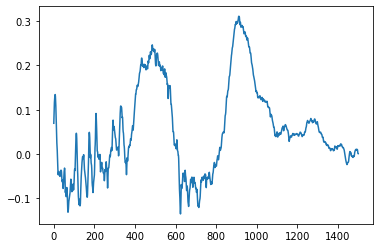

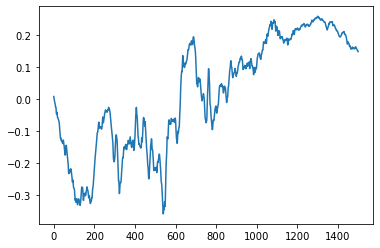

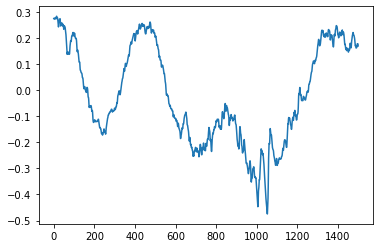

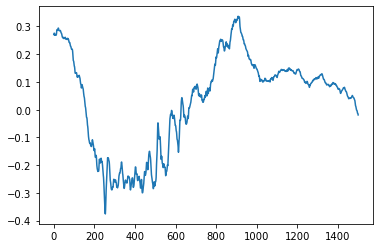

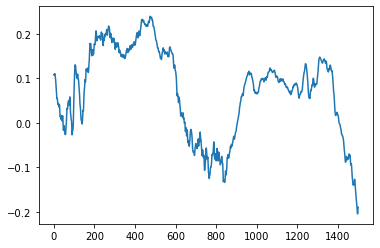

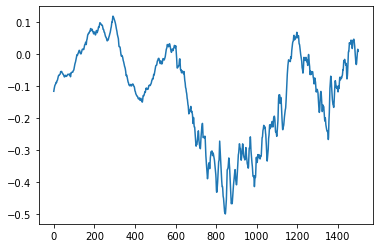

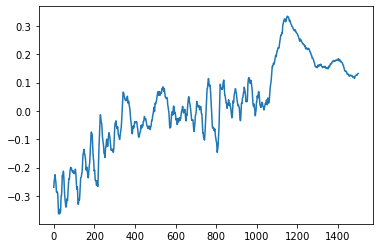

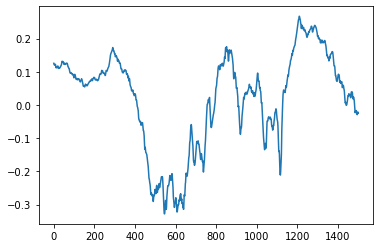

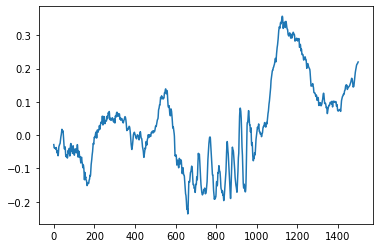

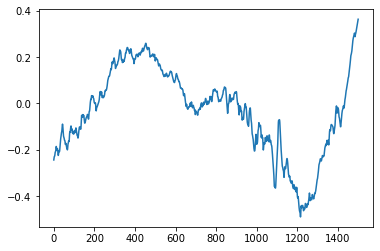

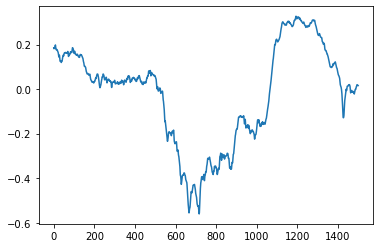

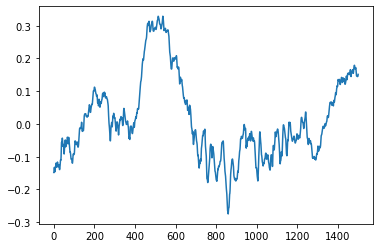

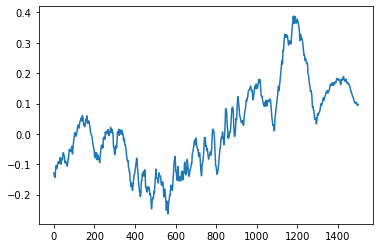

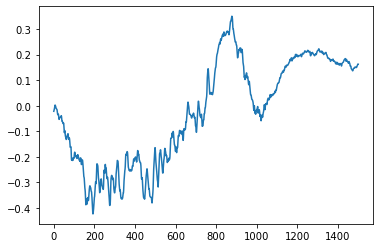

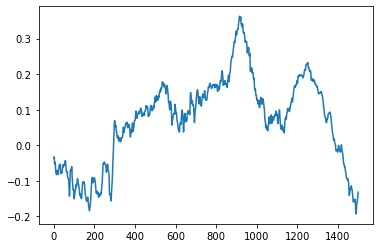

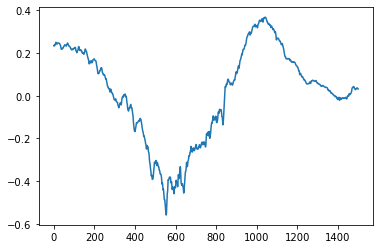

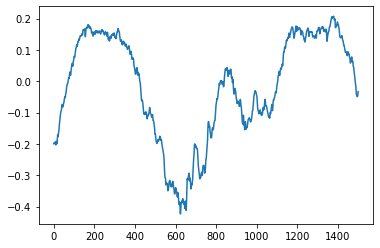

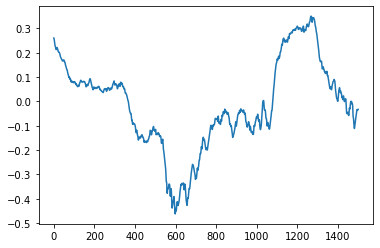

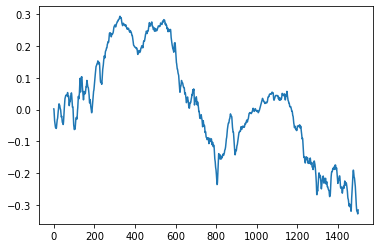

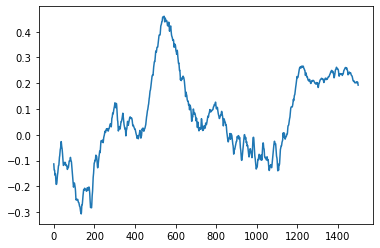

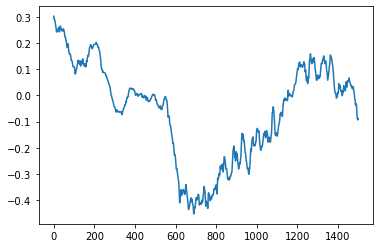

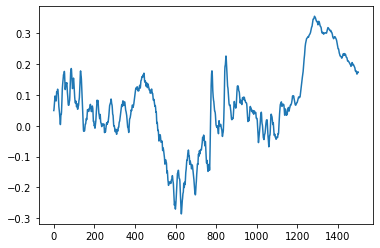

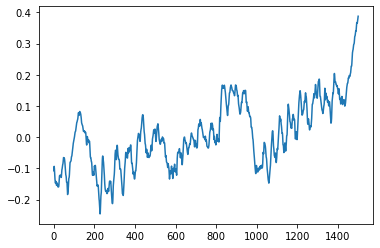

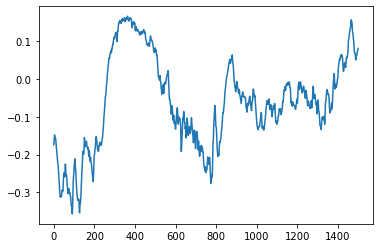

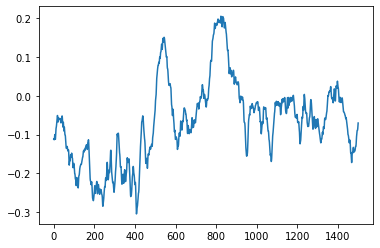

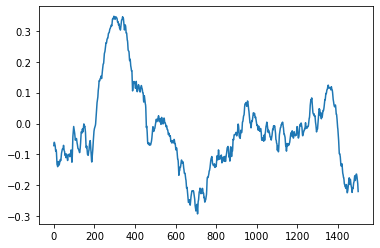

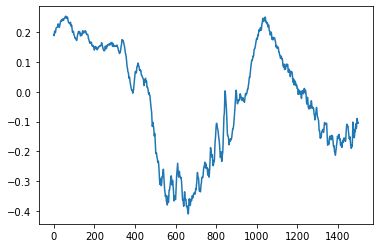

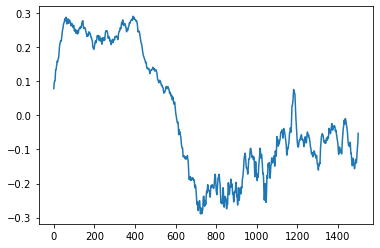

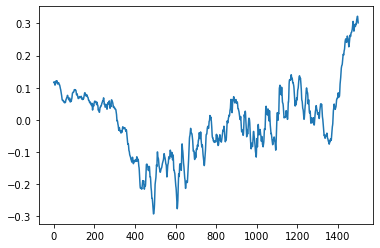

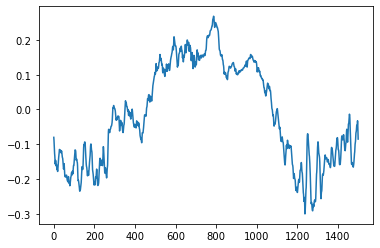

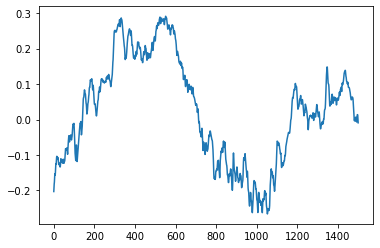

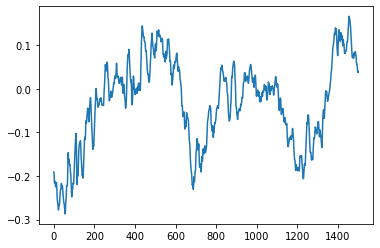

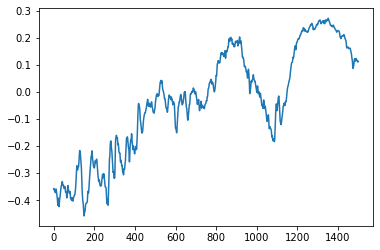

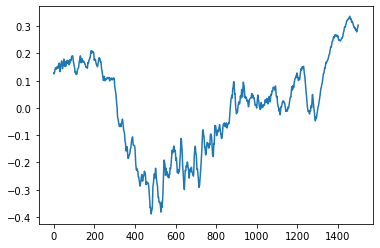

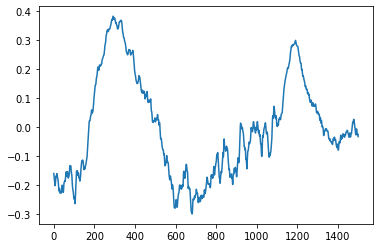

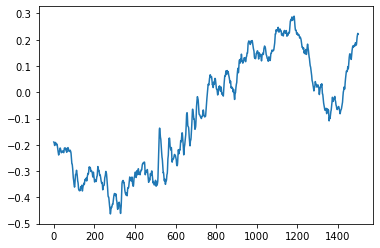

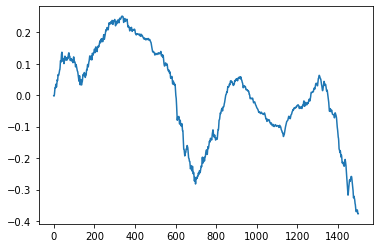

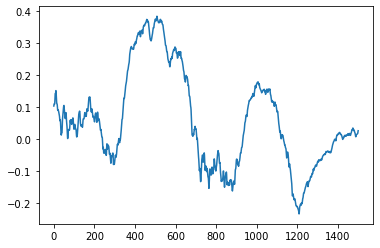

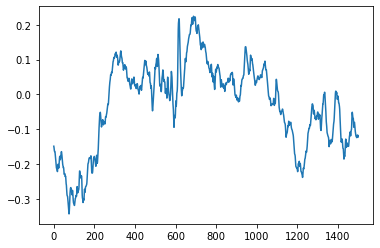

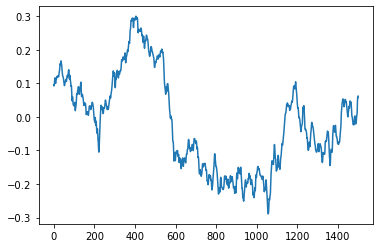

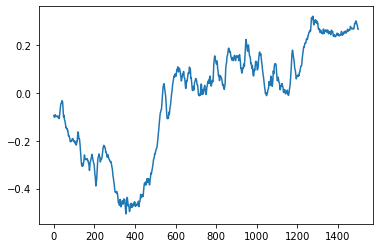

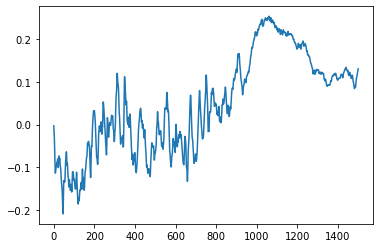

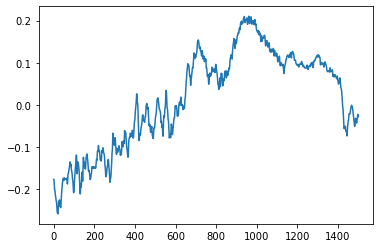

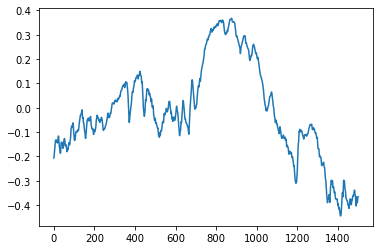

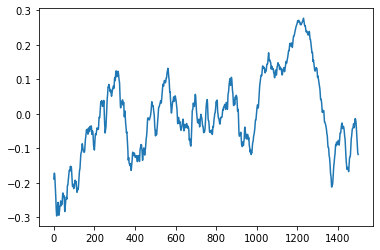

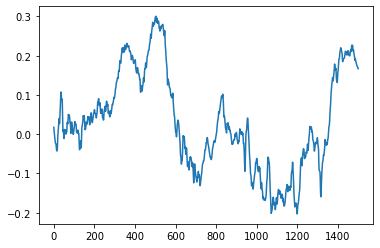

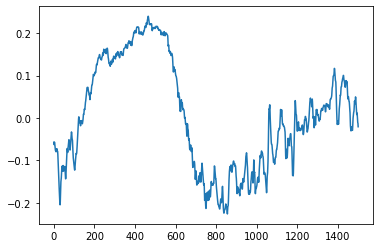

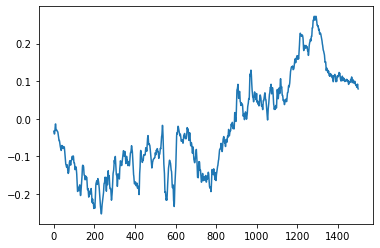

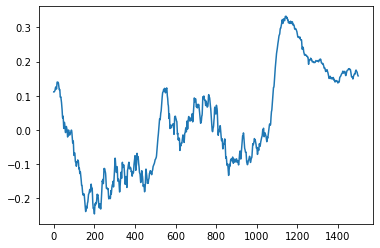

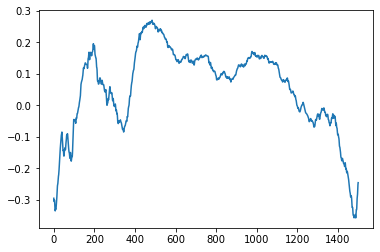

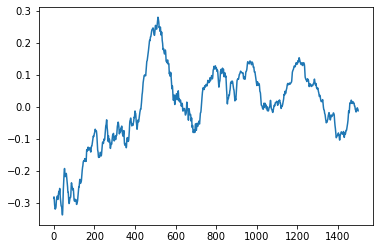

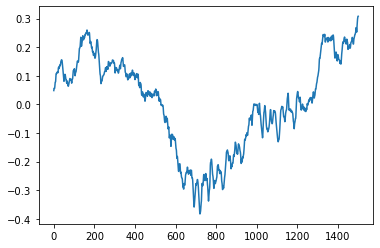

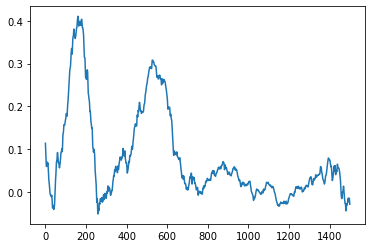

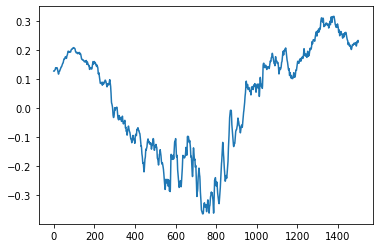

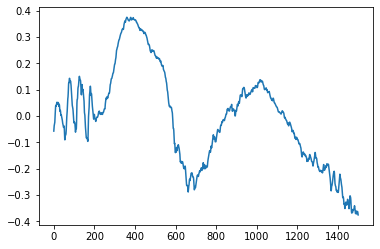

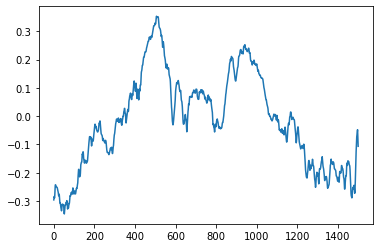

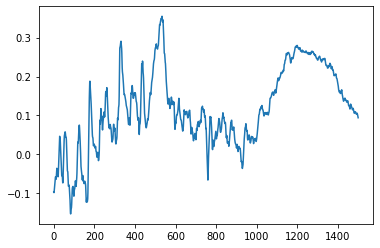

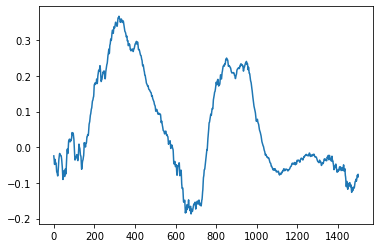

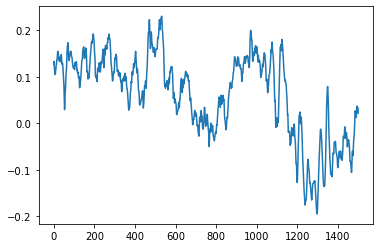

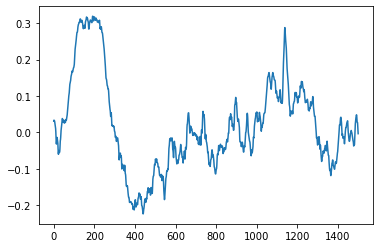

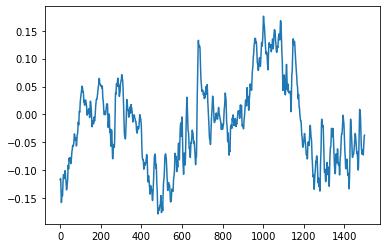

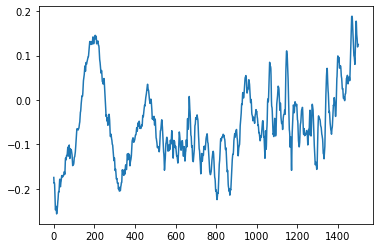

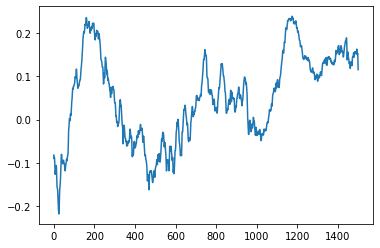

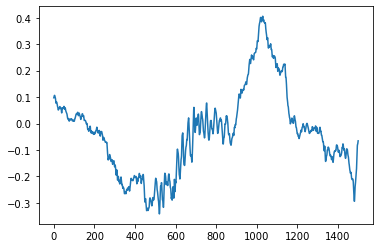

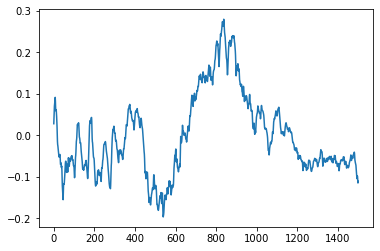

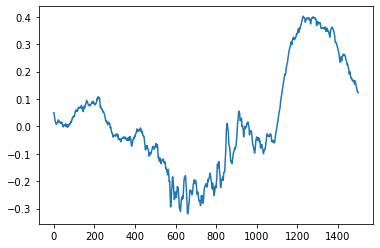

In [116]:
for i in range(data_mat.shape[0]):
    plt.plot(data_mat[i,:])
    plt.show()

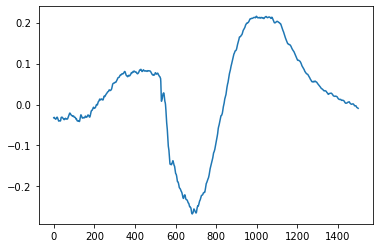

In [112]:
plt.plot(data_mat.mean(0))